In [76]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [77]:
def erreur(y_true, y_pred):
    return np.sqrt((y_true - y_pred)**2)

# # la fonction
# def f(x,y):
#     return np.sin(x + y)

def f(x,y):
    return np.sin(x*2*np.pi*y) + np.cos(np.pi*4*y)

In [78]:
# définition des points
N = 200
N_train = 10
N_batch_train = 4


import numpy as np

def generate_data(N_batch, N_train):
    """
    Génère un batch de grilles aléatoires pour x et y sur [0,1],
    retourne un tensor numpy de shape (N_batch, 2, N_train, N_train)
    """
    batch = np.zeros((N_batch, 2, N_train, N_train))
    
    for i in range(N_batch):
        # Générer des vecteurs x et y aléatoires sur [0,1]
        x = np.random.rand(N_train)
        y = np.random.rand(N_train)
        x = np.sort(x)
        y = np.sort(y)
        # Créer une grille
        X, Y = np.meshgrid(x, y)
        
        # Stocker dans le batch 
        batch[i, 0, :, :] = X
        batch[i, 1, :, :] = Y
    
    return batch

XY_batch = generate_data(N_batch_train, N_train)

# Calculer Z_batch avant transpose pour plus de clarté
Z_batch = f(XY_batch[:,0,:,:], XY_batch[:,1,:,:])  # shape = (100,60,60)
print(Z_batch.shape)
# Maintenant on peut transposer XY_batch pour Conv2D
XY_batch = XY_batch.transpose(0,2,3,1)  # shape = (100,60,60,2)




# N points de test
x_test = np.linspace(0, 1, N)
y_test = np.linspace(0, 1, N)
XY_test = np.meshgrid(x_test, y_test)
XY_test = np.array(XY_test)
Z_test = f(XY_test[0],XY_test[1])


(4, 10, 10)


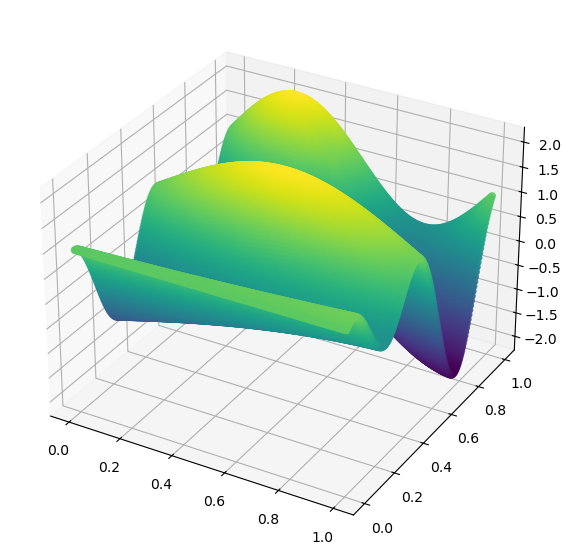

In [79]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(XY_test[0], XY_test[1], f(XY_test[0],XY_test[1]),c = f(XY_test[0],XY_test[1]) ,cmap='viridis', alpha=0.8)
plt.show()

In [80]:
# création du modèle

Inputs = Input(shape=(None,None,2))
x = Conv2D(128, kernel_size=4,padding='same', activation='tanh')(Inputs)
x = Conv2D(32, kernel_size=4,padding='same', activation='tanh')(x)
x_output = Conv2D(1, kernel_size=1,padding='same', activation='tanh')(x)

model = Model(inputs=Inputs, outputs=x_output)


In [81]:
Z_batch = Z_batch[..., np.newaxis]  # ajoute le canal
print(Z_batch.shape)  # (1, 10, 10, 1)


(4, 10, 10, 1)


In [82]:
model.compile(optimizer='adam', loss='mse')
model.fit(XY_batch, Z_batch, epochs=150, batch_size=64)

Epoch 1/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - loss: 0.9912
Epoch 2/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8428
Epoch 3/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8819
Epoch 4/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.8483
Epoch 5/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7699
Epoch 6/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6839
Epoch 7/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6730
Epoch 8/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7294
Epoch 9/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6752
Epoch 10/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6140
Epoch 11/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6065
Epoch 12/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6175
Epoch 13/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6153
Epoch 14/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.5930
Epoch 15/150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.5641
Epoch 16/150
1/1 ━

In [83]:
XY_test_transpose = XY_test.transpose(1, 2, 0)
XY_test_batch = np.expand_dims(XY_test_transpose, axis=0)  # shape (1, 20, 20, 2)
print(XY_test.shape)

(2, 200, 200)


In [84]:
y_pred = model.predict(XY_test_batch)
y_pred = y_pred[0, ..., 0]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [85]:
# calcule de l'erreur entre les 2 fonctions ( prédit - vrai )
res = erreur(y_pred,Z_test)
print(np.sum(res))

33452.40191447551


In [86]:
print(y_pred.shape)
print(XY_test_transpose.shape)
print(XY_test[0].shape)
print(XY_test[1].shape)

(200, 200)
(200, 200, 2)
(200, 200)
(200, 200)


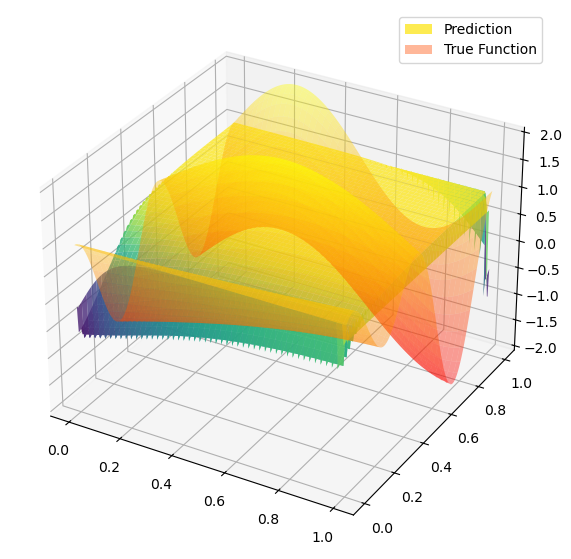

In [97]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

#Affichage en points
ax.plot_surface(XY_test[0], XY_test[1], y_pred,
                cmap='viridis', alpha=0.8,
                label='Prediction')

ax.plot_surface(XY_test[0], XY_test[1], Z_test,
                cmap='autumn', alpha=0.4,
                label='True Function')
ax.legend()
plt.show()


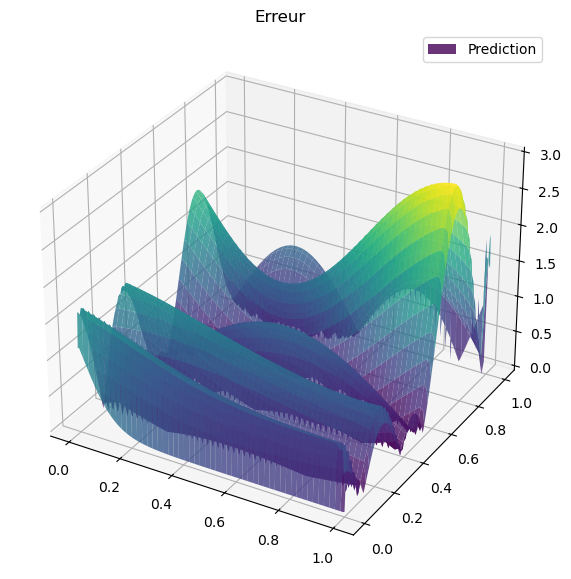

In [98]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Affichage en points
ax.plot_surface(XY_test[0], XY_test[1], res, cmap='viridis',alpha=0.8, label='Prediction')
ax.set_title("Erreur")
ax.legend()
plt.show()

In [89]:
# mse
print(np.sum(res**2)/N**2)

1.0684575748216367


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# -------------------------------
# Paramètres
# -------------------------------
N = 50
np.random.seed(42)
torch.manual_seed(42)

# -------------------------------
# Fonctions cibles
# -------------------------------
def f1(X):
    x, y = X[:, 0], X[:, 1]
    return np.cos(2*np.pi*(x+y))

def f2(X):
    x, y = X[:, 0], X[:, 1]
    return np.sin(2*np.pi*x)*np.cos(2*np.pi*y)

def f3(X):
    x, y = X[:, 0], X[:, 1]
    return np.sin(3*np.pi*x)*np.cos(2*np.pi*y) + np.exp(-5*((x-0.5)**2 + (y-0.5)**2))

functions = [f1, f2, f3]
names = ["f1", "f2", "f3"]

# -------------------------------
# Grille
# -------------------------------
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X_grid, Y_grid = np.meshgrid(x, y)
XY_grid = np.column_stack([X_grid.ravel(), Y_grid.ravel()])

# -------------------------------
# CNN 3 couches PyTorch
# -------------------------------
class SimpleCNN(nn.Module):
    def __init__(self, in_channels=2):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 128, kernel_size=4, padding=2)
        self.conv2 = nn.Conv2d(128, 32, kernel_size=4, padding=2)
        self.conv3 = nn.Conv2d(32, 1, kernel_size=1)
        self.tanh = nn.Tanh()
    def forward(self, x):
        x = self.tanh(self.conv1(x))
        x = self.tanh(self.conv2(x))
        x = self.tanh(self.conv3(x))
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for f, name in zip(functions, names):
    # Création de l'image d'entrée 2 canaux : X et Y
    input_img = np.stack([X_grid, Y_grid], axis=-1)[None, ...]  # shape (1,H,W,2)
    input_torch = torch.tensor(np.transpose(input_img,(0,3,1,2)), dtype=torch.float32).to(device)

    # Fonction vraie comme cible
    y_true = f(XY_grid).reshape(N,N)[None,None,...]  # shape (1,1,H,W)
    y_true_torch = torch.tensor(y_true, dtype=torch.float32).to(device)

    # Modèle
    model = SimpleCNN(in_channels=2).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    loss_fn = nn.MSELoss()

    # Entraînement rapide (toy)
    model.train()
    epochs = 300
    for _ in range(epochs):
        optimizer.zero_grad()
        output = model(input_torch)
        loss = loss_fn(output, y_true_torch)
        loss.backward()
        optimizer.step()

    # Prédiction
    model.eval()
    y_pred = model(input_torch).detach().cpu().numpy().squeeze()

    # --- Figure réelle ---
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X_grid, Y_grid, y_true.squeeze(), cmap='viridis', alpha=0.9)
    ax.set_title(f"Surface réelle - {name}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x,y)")
    fig.colorbar(surf, ax=ax, shrink=0.6, label="Valeur")
    plt.show()

    # --- Figure prédiction ---
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X_grid, Y_grid, y_pred, cmap='plasma', alpha=0.85)
    ax.set_title(f"Prédiction CNN 2D - {name}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("Valeur prédite")
    fig.colorbar(surf, ax=ax, shrink=0.6, label="Valeur")
    plt.show()


c:\Users\ZEJLI\anaconda3\envs\Transformers\lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([1, 1, 50, 50])) that is different to the input size (torch.Size([1, 1, 52, 52])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (52) must match the size of tensor b (50) at non-singleton dimension 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


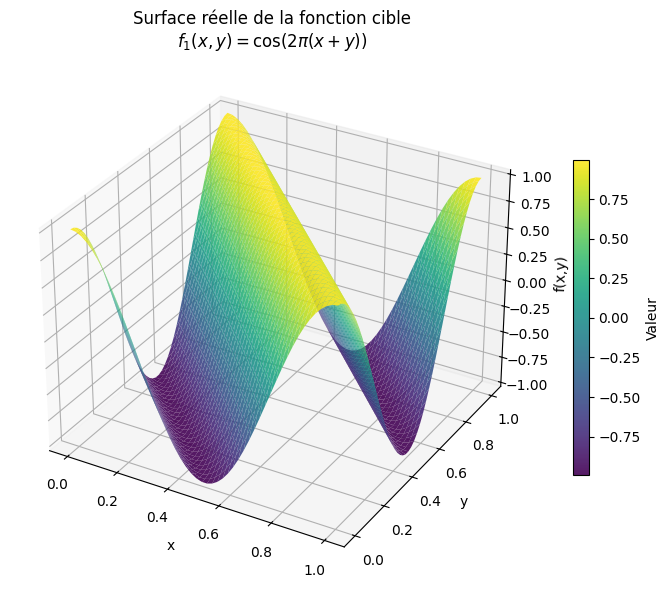

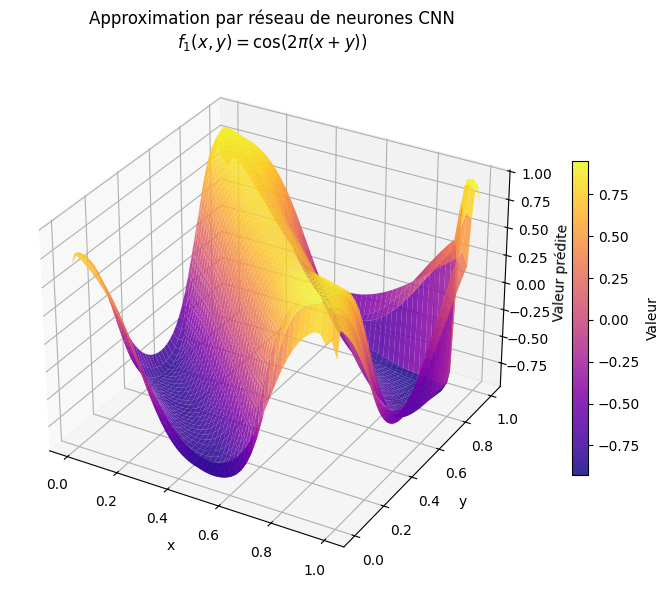

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


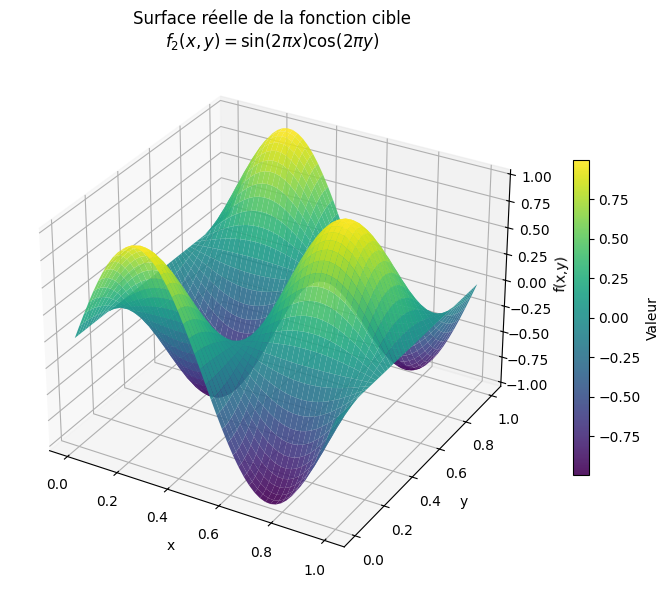

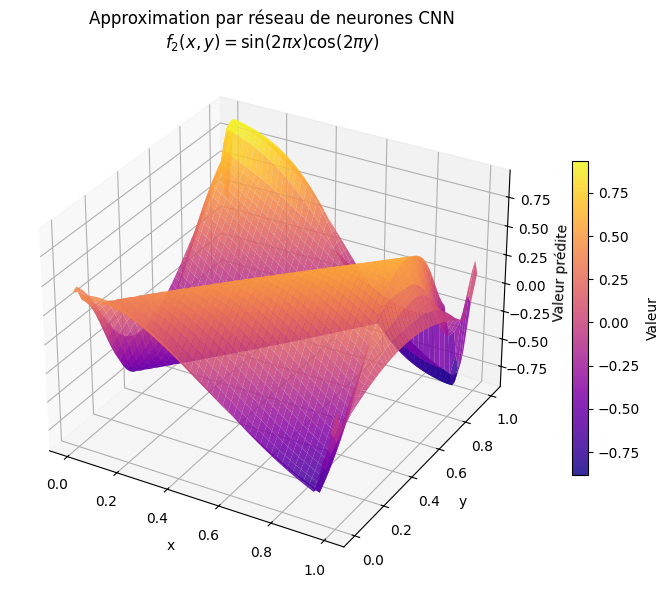

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


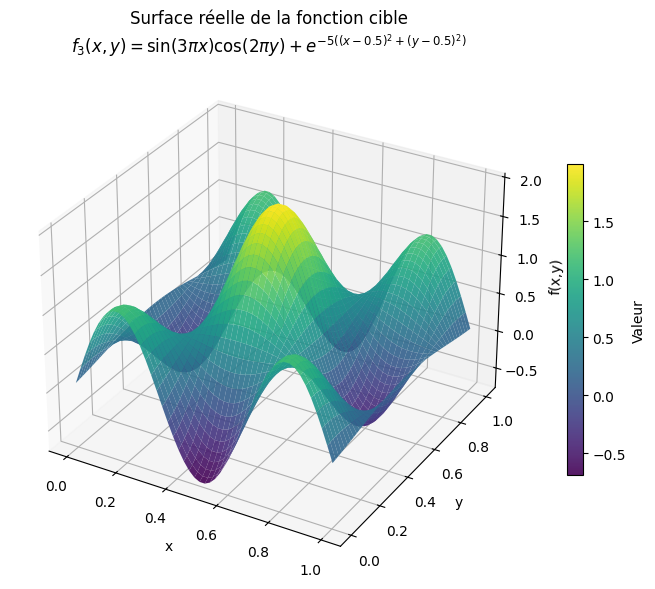

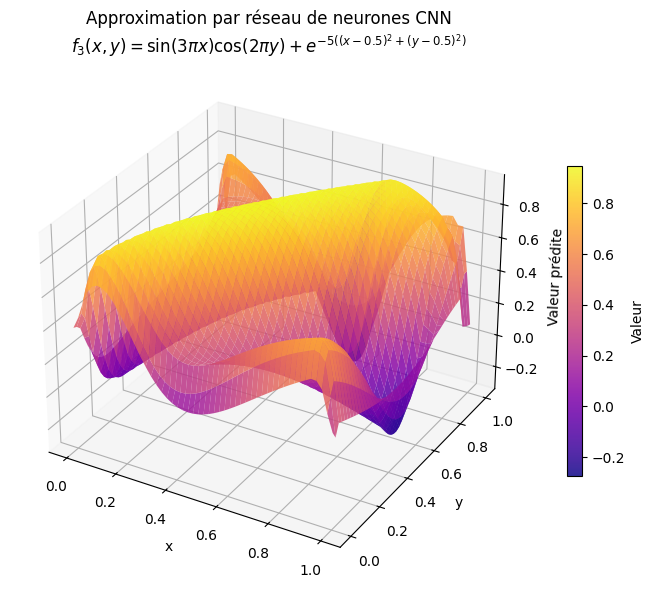

=== Rapport de performance du réseau CNN ===

Fonction : $f_1(x,y)=\cos(2\pi(x+y))$
Erreur quadratique moyenne (MSE) : 5.0739e-02
Score R² : 0.8986

Fonction : $f_2(x,y)=\sin(2\pi x)\cos(2\pi y)$
Erreur quadratique moyenne (MSE) : 9.4135e-02
Score R² : 0.6233

Fonction : $f_3(x,y)=\sin(3\pi x)\cos(2\pi y)+e^{-5((x-0.5)^2+(y-0.5)^2)}$
Erreur quadratique moyenne (MSE) : 1.4622e-01
Score R² : 0.4978


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D
from sklearn.metrics import mean_squared_error, r2_score

# -------------------------------
# Paramètres
# -------------------------------
N = 50
np.random.seed(42)
tf.random.set_seed(42)

# -------------------------------
# Fonctions cibles
# -------------------------------
def f1(X):
    x, y = X[:,0], X[:,1]
    return np.cos(2*np.pi*(x+y))

def f2(X):
    x, y = X[:,0], X[:,1]
    return np.sin(2*np.pi*x)*np.cos(2*np.pi*y)

def f3(X):
    x, y = X[:,0], X[:,1]
    return np.sin(3*np.pi*x)*np.cos(2*np.pi*y) + np.exp(-5*((x-0.5)**2 + (y-0.5)**2))

functions = [f1, f2, f3]
names = [
    r"$f_1(x,y)=\cos(2\pi(x+y))$",
    r"$f_2(x,y)=\sin(2\pi x)\cos(2\pi y)$",
    r"$f_3(x,y)=\sin(3\pi x)\cos(2\pi y)+e^{-5((x-0.5)^2+(y-0.5)^2)}$"
]

# -------------------------------
# Grille
# -------------------------------
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X_grid, Y_grid = np.meshgrid(x,y)
XY_grid = np.column_stack([X_grid.ravel(), Y_grid.ravel()])

# -------------------------------
# Rapport de performance
# -------------------------------
report = []

# -------------------------------
# Boucle sur fonctions
# -------------------------------
for f,name in zip(functions,names):

    # Entrée : image 2 canaux
    input_img = np.stack([X_grid,Y_grid], axis=-1)[None,...]  # (1,H,W,2)
    y_true = f(XY_grid).reshape(N,N)[None,...,None]          # (1,H,W,1)

    # Modèle CNN 3 couches
    inputs = Input(shape=(None,None,2))
    x = Conv2D(128, kernel_size=4, padding='same', activation='tanh')(inputs)
    x = Conv2D(32, kernel_size=4, padding='same', activation='tanh')(x)
    outputs = Conv2D(1, kernel_size=1, padding='same', activation='tanh')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')

    # Entraînement rapide
    model.fit(input_img, y_true, epochs=300, verbose=0)

    # Prédiction
    y_pred = model.predict(input_img).squeeze()

    # --- Calcul des métriques ---
    mse = mean_squared_error(y_true.squeeze().ravel(), y_pred.ravel())
    r2 = r2_score(y_true.squeeze().ravel(), y_pred.ravel())
    report.append({"Fonction": name, "MSE": mse, "R2": r2})

    # --- Figure réelle ---
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X_grid,Y_grid,y_true.squeeze(), cmap='viridis', alpha=0.9)
    ax.set_title("Surface réelle de la fonction cible\n" + name)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x,y)")
    fig.colorbar(surf, ax=ax, shrink=0.6, label="Valeur")
    plt.tight_layout()
    plt.show()

    # --- Figure prédiction ---
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X_grid,Y_grid,y_pred, cmap='plasma', alpha=0.85)
    ax.set_title("Approximation par réseau de neurones CNN\n" + name)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("Valeur prédite")
    fig.colorbar(surf, ax=ax, shrink=0.6, label="Valeur")
    plt.tight_layout()
    plt.show()

# --- Rapport des performances ---
print("=== Rapport de performance du réseau CNN ===")
for r in report:
    print(f"\nFonction : {r['Fonction']}")
    print(f"Erreur quadratique moyenne (MSE) : {r['MSE']:.4e}")
    print(f"Score R² : {r['R2']:.4f}")
